In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\train.csv')
test_df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\test.csv')

In [7]:
train_df.shape

(4922, 21)

In [8]:
test_df.shape

(2110, 21)

In [9]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5154-VEKBL,Female,No,No,No,9,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85,Yes
1,9052-DHNKM,Male,No,No,No,26,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Electronic check,61.55,1581.95,No
2,2988-PLAHS,Female,No,No,No,3,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45,No
3,1196-AMORA,Male,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,73.60,520.00,Yes
4,6695-FRVEC,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.70,No


In [10]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6614-YWYSC,Male,Yes,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
1,9546-KDTRB,Female,No,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
2,0871-URUWO,Male,No,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3,5151-HQRDG,Male,No,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4,6624-JDRDS,Female,No,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [17]:
train_df.drop('customerID', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

In [13]:
test_df.drop('customerID', axis=1, inplace=True)

In [14]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,Yes,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
1,Female,No,No,No,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
2,Male,No,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3,Male,No,Yes,No,37,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4,Female,No,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [18]:
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
test_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
num_cols = ['MonthlyCharges', 'TotalCharges']
            
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
            
num_pipeline = Pipeline(steps = [('scaler', Normalizer())])
            
cat_pipeline = Pipeline(steps = [('encoder', OneHotEncoder())])

In [21]:
df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\data_cleaned.csv')

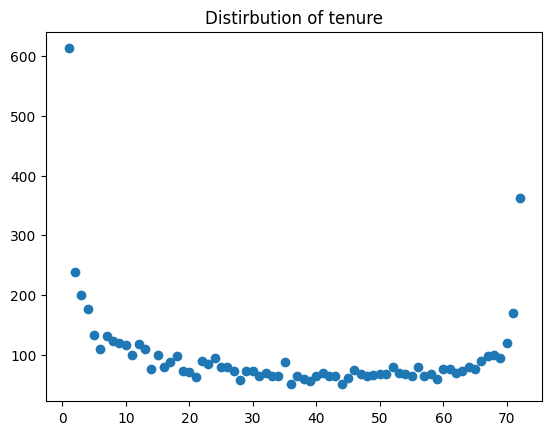

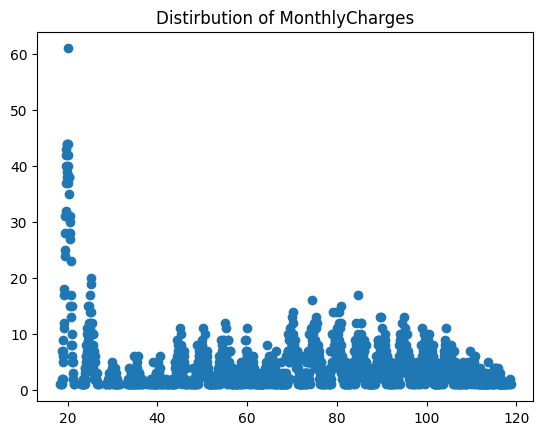

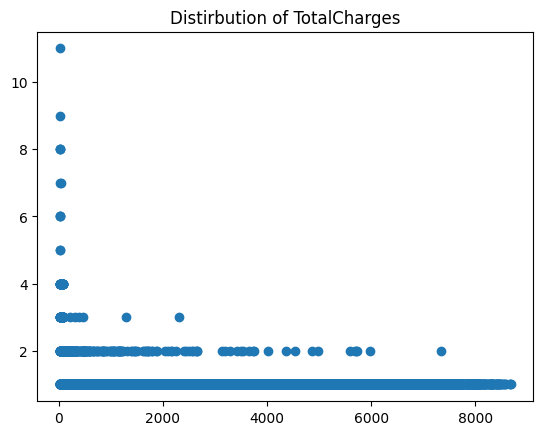

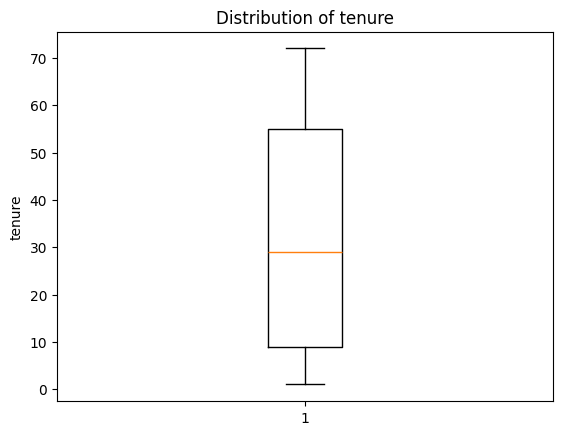

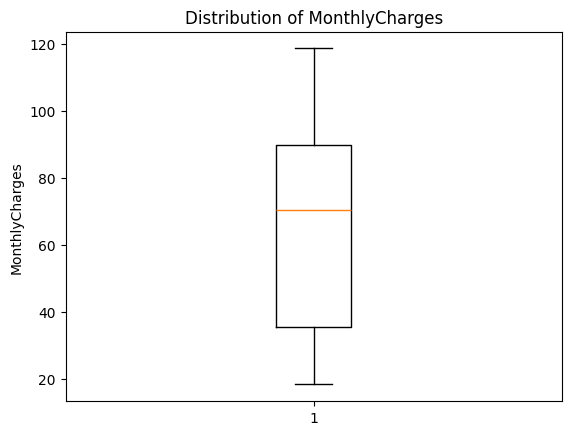

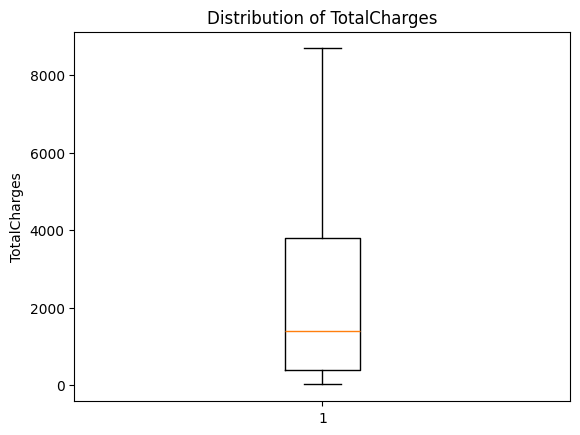

In [24]:
# handling outliers 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# visualizing to determine the presence of outliers 
# scatter plot
for col in num_cols:
    plt.scatter(df[col].value_counts().index, df[col].value_counts())
    plt.title("Distirbution of " + col)
    plt.show()

# box plot
for col in num_cols:
    plt.boxplot(df[col])
    plt.title("Distribution of " + col)
    plt.ylabel(col)
    plt.show()



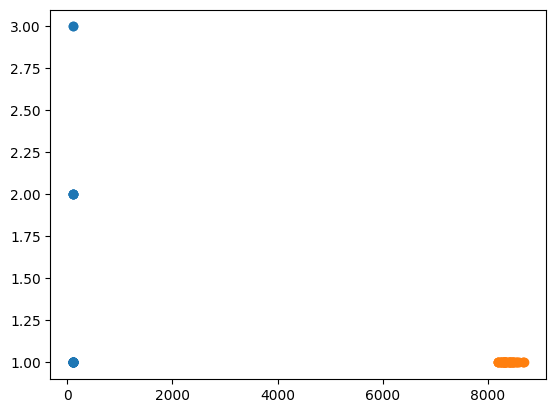

In [43]:
def detect_outliers(df, num_cols, threshold=2.6):
    outliers = pd.DataFrame()
    for col in num_cols:
        mean = np.mean(df[col])
        std = np.std(df[col])
        z_scores = (df[col] - mean) / std
        outlier_values = df[np.abs(z_scores) > threshold]
        outliers = pd.concat([outliers, outlier_values])
    return outliers 
    
outliers_df = detect_outliers(df, num_cols)

# visualizing outliers 
plt.scatter(outliers_df['MonthlyCharges'].value_counts().index, outliers_df['MonthlyCharges'].value_counts())
plt.scatter(outliers_df['TotalCharges'].value_counts().index, outliers_df['TotalCharges'].value_counts())


In [45]:
outliers_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
437,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20,No
464,Male,Yes,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8404.90,No
525,Male,Yes,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.15,No
539,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.50,No
550,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.60,8220.40,No
607,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.55,8306.05,No
745,Male,Yes,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,8196.40,No
848,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8476.50,No
894,Male,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.10,8310.55,No
1131,Female,Yes,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.65,8333.95,No


In [46]:
outliers_df.shape

(48, 20)

In [47]:
outliers_df.to_csv("F:\Data Science\Rough\outliers.csv")

In [ ]:

# removing outliers 
df_cleaned = df_encoded.drop(outliers_df.index)

print("Size before removing outliers: ",df_encoded.shape[0])
print("Size after removing outliers: ",df_cleaned.shape[0])
